<a href="https://colab.research.google.com/github/julianl11/projektarbeit_1/blob/main/pytorch_course/02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X,y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.46463176  0.15322829]
 [-0.4601531   0.10446773]
 [-0.51775752  0.13568206]
 [-0.26599694  0.42143465]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [4]:
import pandas

In [5]:
circles_df = pandas.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "y": y[:]})
circles_df.head()

,X1,X2,y
0,0.464632,0.153228,1
1,-0.460153,0.104468,1
2,-0.517758,0.135682,1
3,-0.265997,0.421435,1
4,0.442208,-0.896723,0


In [6]:
import matplotlib.pyplot as plt

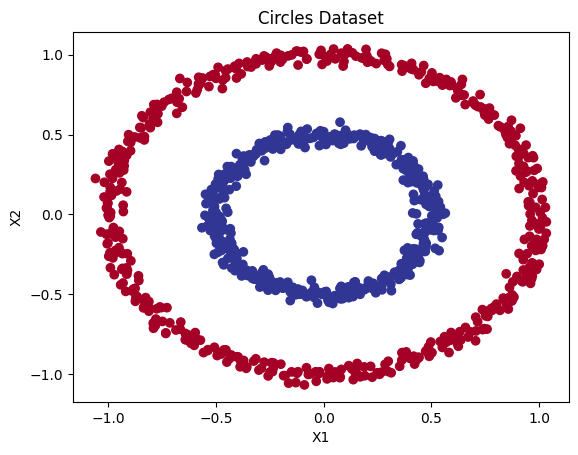

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Circles Dataset")
plt.show()

# Check input and output

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"X: {X_sample}, y: {y_sample}")
print(f"X: {X_sample.shape}, y: {y_sample.shape}")

X: [0.46463176 0.15322829], y: 1
X: (2,), y: ()


In [10]:
import torch
print(torch.__version__)

2.6.0+cu124


In [11]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [12]:
type(X)

torch.Tensor

In [13]:
X[:5]

tensor([[ 0.4646,  0.1532],
        [-0.4602,  0.1045],
        [-0.5178,  0.1357],
        [-0.2660,  0.4214],
        [ 0.4422, -0.8967]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=33)

In [16]:
len(X_train), len(X_test)

(800, 200)

In [17]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [18]:
class CircleModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer_1 = nn.Linear(in_features=2, out_features=5)
    self.linear_layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x: torch.Tensor):

    return self.linear_layer_2((self.linear_layer_1(x)))



In [19]:
model = CircleModel().to(device)
model

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
next(model.parameters())

Parameter containing:
tensor([[ 0.6361, -0.6271],
        [-0.6982,  0.1643],
        [ 0.2856,  0.5749],
        [ 0.5104,  0.7012],
        [ 0.1032, -0.4538]], requires_grad=True)

In [21]:
model_sequential = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=2)
)
print(model_sequential)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=2, bias=True)
)


In [22]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.6361, -0.6271],
                      [-0.6982,  0.1643],
                      [ 0.2856,  0.5749],
                      [ 0.5104,  0.7012],
                      [ 0.1032, -0.4538]])),
             ('linear_layer_1.bias',
              tensor([ 0.2202, -0.6313,  0.4787,  0.0579,  0.4341])),
             ('linear_layer_2.weight',
              tensor([[-0.0690, -0.4343, -0.2104,  0.2614,  0.4360]])),
             ('linear_layer_2.bias', tensor([0.4036]))])

In [23]:
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
print(f"Length of preds: {len(untrained_preds)} and shape {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)} and shape {y_test.unsqueeze(dim=1).shape}  ")

Length of preds: 200 and shape torch.Size([200, 1])
Length of test samples: 200 and shape torch.Size([200, 1])  


In [24]:
y_test.unsqueeze(dim=1)[:10], untrained_preds[:10]

(tensor([[0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.]]),
 tensor([[0.8308],
         [0.8949],
         [0.8834],
         [1.0800],
         [0.5281],
         [0.9184],
         [0.9546],
         [0.9205],
         [1.0408],
         [0.6453]]))

In [25]:
X_train[:10], y_train[:10]

(tensor([[ 0.9859, -0.0592],
         [ 1.0005, -0.3119],
         [-0.1628, -1.0567],
         [-0.3379, -0.3772],
         [-0.9720,  0.3617],
         [ 0.2593, -1.0015],
         [ 0.2998,  0.4528],
         [ 0.3661, -0.3449],
         [-0.4697,  0.1980],
         [ 0.1170, -0.4774]]),
 tensor([0., 0., 0., 1., 0., 0., 1., 1., 1., 1.]))

# loss & optimizer

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [27]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [28]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.6361, -0.6271],
                      [-0.6982,  0.1643],
                      [ 0.2856,  0.5749],
                      [ 0.5104,  0.7012],
                      [ 0.1032, -0.4538]])),
             ('linear_layer_1.bias',
              tensor([ 0.2202, -0.6313,  0.4787,  0.0579,  0.4341])),
             ('linear_layer_2.weight',
              tensor([[-0.0690, -0.4343, -0.2104,  0.2614,  0.4360]])),
             ('linear_layer_2.bias', tensor([0.4036]))])

In [29]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_train.to(device))
y_logits[:5]

tensor([[1.1483],
        [1.1952],
        [0.8777],
        [0.7003],
        [0.3399]])

In [30]:
y_preds_prob = torch.sigmoid(y_logits)
y_preds_prob[:5]

tensor([[0.7592],
        [0.7677],
        [0.7063],
        [0.6683],
        [0.5842]])

In [31]:
y_preds = torch.round(y_preds_prob)[:5]

y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
print(torch.eq(y_preds, y_pred_labels.squeeze()))
#

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])


In [32]:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train) # BCEWithLogitsLoss !

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred= test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc:.5f}%")


Epoch: 0 | Test Loss: 0.8100780248641968 | Test Acc: 44.50000%
Epoch: 10 | Test Loss: 0.7271186709403992 | Test Acc: 44.50000%
Epoch: 20 | Test Loss: 0.6975463032722473 | Test Acc: 50.50000%
Epoch: 30 | Test Loss: 0.6931955814361572 | Test Acc: 40.50000%
Epoch: 40 | Test Loss: 0.697634756565094 | Test Acc: 48.00000%
Epoch: 50 | Test Loss: 0.7016140818595886 | Test Acc: 60.50000%
Epoch: 60 | Test Loss: 0.7009301781654358 | Test Acc: 58.00000%
Epoch: 70 | Test Loss: 0.6992476582527161 | Test Acc: 60.00000%
Epoch: 80 | Test Loss: 0.6990339159965515 | Test Acc: 61.50000%
Epoch: 90 | Test Loss: 0.6995934844017029 | Test Acc: 61.00000%


In [33]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  print(request.status_code)
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


200


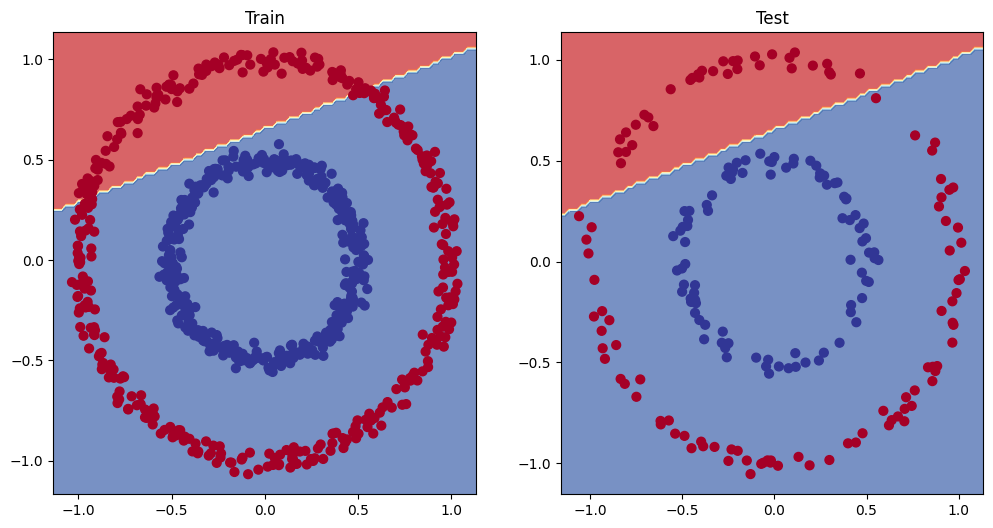

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [35]:
model.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[ 0.5809, -0.6408],
                      [-0.6358,  0.1147],
                      [ 0.2668,  0.5402],
                      [ 0.4541,  0.7677],
                      [ 0.0423, -0.4059]])),
             ('linear_layer_1.bias',
              tensor([ 0.3900, -0.4436,  0.6531, -0.1125,  0.2454])),
             ('linear_layer_2.weight',
              tensor([[-0.1997, -0.2640, -0.3758,  0.1537,  0.2473]])),
             ('linear_layer_2.bias', tensor([0.2200]))])

In [36]:
model

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [37]:
class CircleModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer_1 = nn.Linear(in_features=2, out_features=10)
    self.linear_layer_2 = nn.Linear(in_features=10, out_features=10)
    self.linear_layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor):

    return self.linear_layer_3((self.linear_layer_2(self.linear_layer_1(x))))



In [38]:
model_3 = CircleModel()
model_3

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

In [40]:
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [41]:
model_3.to(device)

CircleModel(
  (linear_layer_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc:.5f}%")

Epoch: 0 | Test Loss: 0.6917443871498108 | Test Acc: 55.50000%
Epoch: 10 | Test Loss: 0.6910872459411621 | Test Acc: 55.50000%
Epoch: 20 | Test Loss: 0.690645694732666 | Test Acc: 55.50000%
Epoch: 30 | Test Loss: 0.690377950668335 | Test Acc: 55.50000%
Epoch: 40 | Test Loss: 0.6902495622634888 | Test Acc: 55.50000%
Epoch: 50 | Test Loss: 0.6902323961257935 | Test Acc: 55.50000%
Epoch: 60 | Test Loss: 0.6903030276298523 | Test Acc: 55.50000%
Epoch: 70 | Test Loss: 0.6904423236846924 | Test Acc: 55.50000%
Epoch: 80 | Test Loss: 0.6906344890594482 | Test Acc: 55.50000%
Epoch: 90 | Test Loss: 0.6908665299415588 | Test Acc: 55.50000%


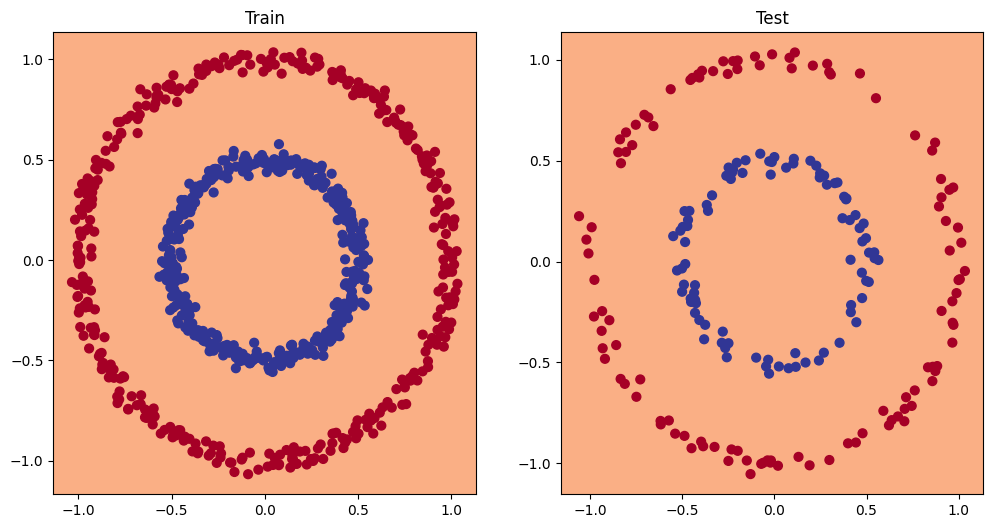

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [97]:
w = 2
b = 0.125
X = torch.arange(1, 10, 0.2).unsqueeze(dim=1)
y = w * X + b
print(X[:5], y[:5])

tensor([[1.0000],
        [1.2000],
        [1.4000],
        [1.6000],
        [1.8000]]) tensor([[2.1250],
        [2.5250],
        [2.9250],
        [3.3250],
        [3.7250]])


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [99]:
X_train, y_train

(tensor([[6.4000],
         [4.2000],
         [3.8000],
         [2.2000],
         [8.8000],
         [1.6000],
         [7.4000],
         [7.0000],
         [1.0000],
         [6.2000],
         [4.4000],
         [9.4000],
         [2.6000],
         [2.8000],
         [4.0000],
         [4.8000],
         [8.6000],
         [4.6000],
         [6.8000],
         [7.6000],
         [9.8000],
         [9.0000],
         [5.4000],
         [1.8000],
         [5.6000],
         [8.0000],
         [6.0000],
         [9.2000],
         [7.2000],
         [5.0000],
         [3.2000],
         [1.4000],
         [3.0000],
         [5.8000],
         [8.2000],
         [9.6000]]),
 tensor([[12.9250],
         [ 8.5250],
         [ 7.7250],
         [ 4.5250],
         [17.7250],
         [ 3.3250],
         [14.9250],
         [14.1250],
         [ 2.1250],
         [12.5250],
         [ 8.9250],
         [18.9250],
         [ 5.3250],
         [ 5.7250],
         [ 8.1250],
         [ 9.7

In [100]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [101]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [106]:
for epoch in range(epochs):
  model_2.train()

  y_preds = model_2(X_train)
  #print(y_preds, y_train)
  loss = loss_fn(y_preds, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()

  with torch.inference_mode():

    test_preds = model_2(X_test)
    test_loss = loss_fn(test_preds, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss}")

Epoch: 0 | Test Loss: 0.8938670754432678
Epoch: 10 | Test Loss: 1.880196213722229
Epoch: 20 | Test Loss: 0.11734533309936523
Epoch: 30 | Test Loss: 1.3888334035873413
Epoch: 40 | Test Loss: 1.075559139251709
Epoch: 50 | Test Loss: 0.59831702709198
Epoch: 60 | Test Loss: 1.8407137393951416
Epoch: 70 | Test Loss: 0.3990355432033539
Epoch: 80 | Test Loss: 1.6865254640579224
Epoch: 90 | Test Loss: 0.12082497030496597


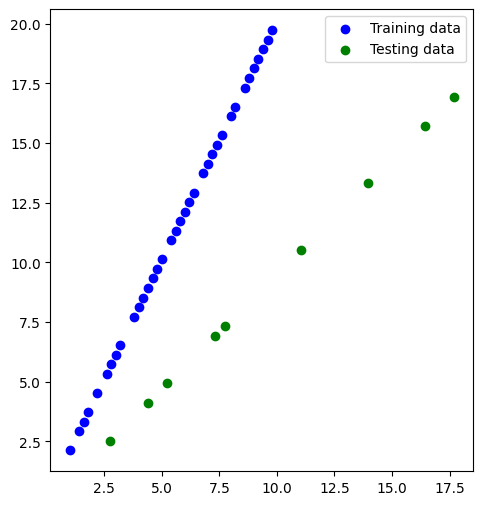

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(test_preds, y_test, c="g", label="Testing data")
plt.legend()

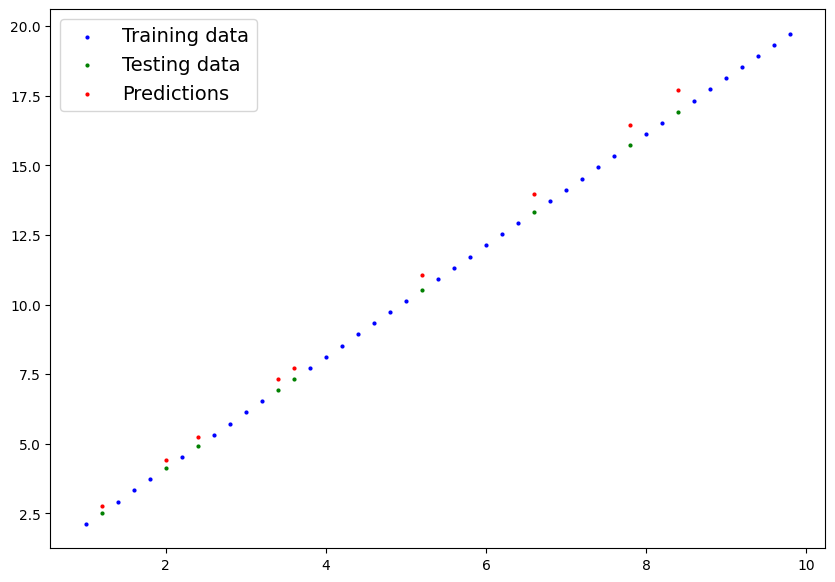

In [111]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [114]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


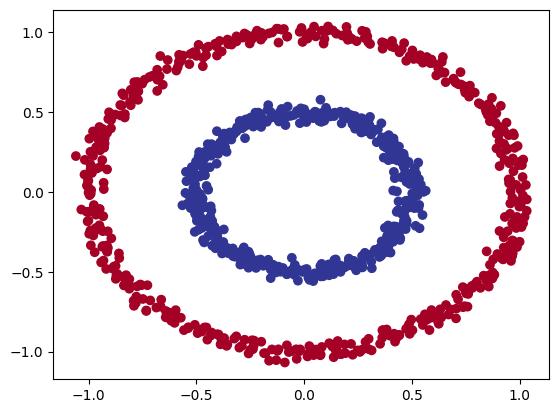

In [123]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [118]:
type(X)

numpy.ndarray

In [126]:
class CircleModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor):
    return self.layer_2(self.relu(self.layer_1(x)))

In [127]:
model_4 = CircleModelV2()
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [128]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_4.parameters(), lr=0.01)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [138]:
epochs = 1000

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Test Loss: {test_loss} | Test Acc: {test_acc:.5f}%")

Epoch: 0 | Test Loss: 0.011491450481116772 | Test Acc: 100.00000%
Epoch: 100 | Test Loss: 0.009850624017417431 | Test Acc: 100.00000%
Epoch: 200 | Test Loss: 0.008534882217645645 | Test Acc: 100.00000%
Epoch: 300 | Test Loss: 0.0074667371809482574 | Test Acc: 100.00000%
Epoch: 400 | Test Loss: 0.006584220100194216 | Test Acc: 100.00000%
Epoch: 500 | Test Loss: 0.0058466712944209576 | Test Acc: 100.00000%
Epoch: 600 | Test Loss: 0.00522341625764966 | Test Acc: 100.00000%
Epoch: 700 | Test Loss: 0.0046917651779949665 | Test Acc: 100.00000%
Epoch: 800 | Test Loss: 0.004234391264617443 | Test Acc: 100.00000%
Epoch: 900 | Test Loss: 0.0038391095586121082 | Test Acc: 100.00000%


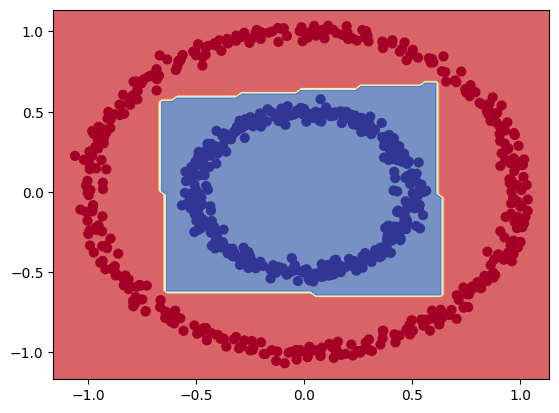

In [139]:
plot_decision_boundary(model_4, X_train, y_train)

In [134]:
test_logits.shape, y_test.shape

(torch.Size([200]), torch.Size([200]))

In [141]:
A = torch.arange(-10, 10, 1., dtype=torch.float32)
A.dtype

torch.float32

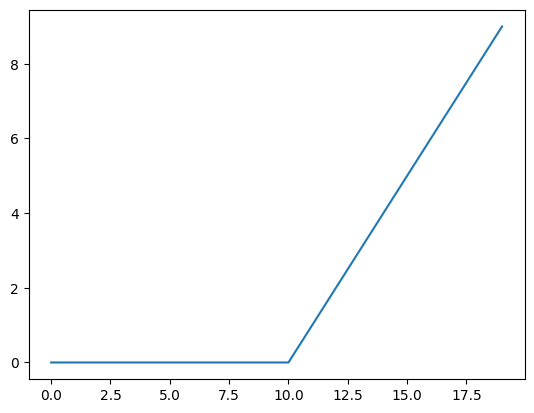

In [143]:
plt.plot(torch.relu(A))

In [146]:
def relu(x: torch.Tensor):
  return torch.max(torch.tensor(0.), x)

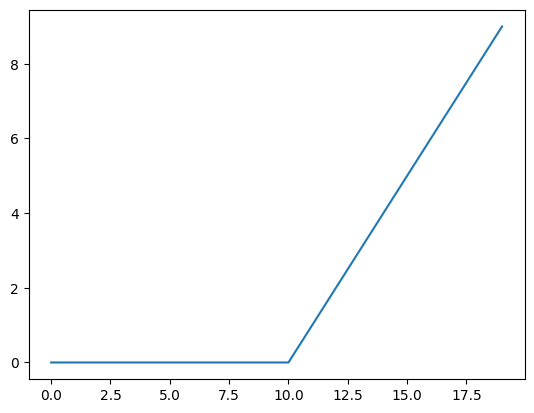

In [150]:
custom_relu = plt.plot(relu(A))
custom_relu

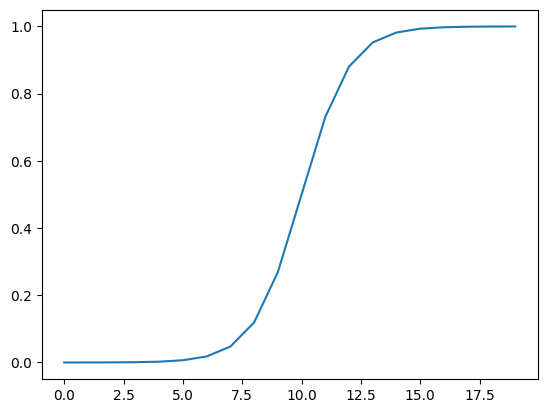

In [151]:
plt.plot(torch.sigmoid(A))

In [152]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [176]:
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers = 4, cluster_std=1.5, random_state=42)


In [177]:
X_blob.shape, y_blob.shape, X_blob[:5], y_blob[:5]

((1000, 2),
 (1000,),
 array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

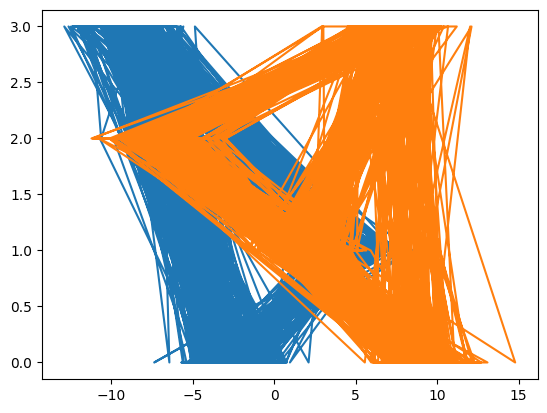

In [178]:
plt.plot(X_blob, y_blob)


In [179]:
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

In [180]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

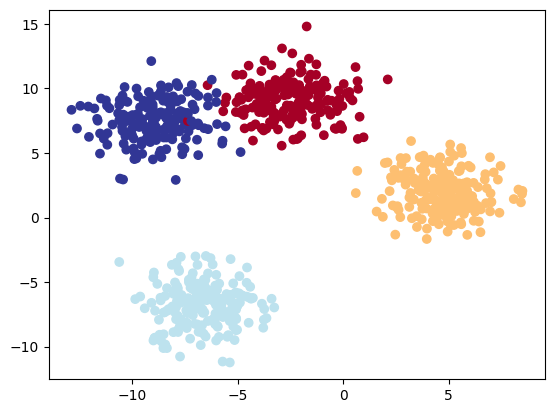

In [181]:
plt.scatter(X_blob_train[:, 0], X_blob_train[:, 1], c=y_blob_train, cmap=plt.cm.RdYlBu)